In [1]:
!pip install transformers
!pip install huggingface_hub
!pip install torch

In [13]:
import pandas as pd
import numpy as np


data = pd.read_csv('df_indexed.csv')
data.tail()

,Date,Amount,Amount_sum,Month,Day,Year,is_month_start,AccountBalance
277,2019-05-05,0.00,8696.70,5,5,2019,False,4348.35
278,2019-05-06,-184.83,38471.95,5,6,2019,False,4163.52
279,2019-05-07,-80.48,4083.04,5,7,2019,False,4083.04
280,2019-05-08,0.00,8166.08,5,8,2019,False,4083.04
281,2019-05-09,-54.83,4028.21,5,9,2019,False,4028.21


In [14]:
import pandas as pd
from transformers import TimeSeriesTransformerModel, TimeSeriesTransformerConfig
from datetime import datetime, timedelta


# Prepare the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select the column of interest
series_data = data['AccountBalance']

# Define the configuration and model for the time series transformer
config = TimeSeriesTransformerConfig(
    prediction_length = 60,
    d_model=64,  # Model dimension
    num_heads=4,  # Number of attention heads
    num_encoder_layers=3,  # Number of encoder layers
    num_decoder_layers=3,  # Number of decoder layers
    dim_feedforward=256,  # Dimension of feedforward network
    dropout=0.1,  # Dropout rate
    activation='relu'  # Activation function
)
model = TimeSeriesTransformerModel(config)

# Define the end date for forecasting
end_date = datetime(2021, 1, 31)  # Change this to your desired end date
forecast_length = (end_date - series_data.index[-1]).days

# Generate future dates
future_dates = pd.date_range(start=series_data.index[-1] + timedelta(days=1), periods=forecast_length, freq='D')

# Here you would train the model and then predict
model.fit(series_data)
forecasted_values = model.predict(future_dates)

# For illustration, let's assume the forecasting part is handled as above
# This is just a placeholder for your actual forecasting logic


AttributeError: 'TimeSeriesTransformerModel' object has no attribute 'fit'

In [10]:
import pandas as pd
import numpy as np

data_json = [{"date":"2024-04-21","category":"Food and Drink","amount":12},{"date":"2024-04-21","category":"Food and Drink","amount":4.33},{"date":"2024-04-20","category":"Food and Drink","amount":89.4},{"date":"2024-04-19","category":"Transfer","amount":-4.22},{"date":"2024-04-07","category":"Travel","amount":6.33},{"date":"2024-03-25","category":"Payment","amount":25},{"date":"2024-03-25","category":"Travel","amount":5.4},{"date":"2024-03-23","category":"Travel","amount":-500},{"date":"2024-03-22","category":"Food and Drink","amount":12},{"date":"2024-03-22","category":"Food and Drink","amount":4.33},{"date":"2024-03-21","category":"Uncategorized","amount":89.4},{"date":"2024-03-20","category":"Uncategorized","amount":-4.22},{"date":"2024-03-08","category":"Uncategorized","amount":6.33},{"date":"2024-02-24","category":"Payment","amount":25},{"date":"2024-02-24","category":"Uncategorized","amount":5.4},{"date":"2024-02-22","category":"Travel","amount":-500},{"date":"2024-02-21","category":"Food and Drink","amount":12},{"date":"2024-02-21","category":"Food and Drink","amount":4.33},{"date":"2024-02-20","category":"Uncategorized","amount":89.4},{"date":"2024-02-19","category":"Uncategorized","amount":-4.22},{"date":"2024-02-07","category":"Uncategorized","amount":6.33},{"date":"2024-01-25","category":"Payment","amount":25},{"date":"2024-01-25","category":"Uncategorized","amount":5.4},{"date":"2024-01-23","category":"Travel","amount":-500},{"date":"2024-01-22","category":"Food and Drink","amount":12},{"date":"2024-01-22","category":"Food and Drink","amount":4.33},{"date":"2024-01-21","category":"Uncategorized","amount":89.4},{"date":"2024-01-20","category":"Uncategorized","amount":-4.22},{"date":"2024-01-08","category":"Uncategorized","amount":6.33},{"date":"2023-12-26","category":"Payment","amount":25},{"date":"2023-12-26","category":"Uncategorized","amount":5.4},{"date":"2023-12-24","category":"Travel","amount":-500},{"date":"2023-12-23","category":"Food and Drink","amount":12},{"date":"2023-12-23","category":"Food and Drink","amount":4.33},{"date":"2023-12-22","category":"Uncategorized","amount":89.4},{"date":"2023-12-21","category":"Uncategorized","amount":-4.22},{"date":"2023-12-09","category":"Uncategorized","amount":6.33},{"date":"2023-11-26","category":"Payment","amount":25},{"date":"2023-11-26","category":"Uncategorized","amount":5.4},{"date":"2023-11-24","category":"Travel","amount":-500},{"date":"2023-11-23","category":"Food and Drink","amount":12},{"date":"2023-11-23","category":"Food and Drink","amount":4.33},{"date":"2023-11-22","category":"Uncategorized","amount":89.4},{"date":"2023-11-21","category":"Uncategorized","amount":-4.22},{"date":"2023-11-09","category":"Uncategorized","amount":6.33},{"date":"2023-10-27","category":"Payment","amount":25},{"date":"2023-10-27","category":"Uncategorized","amount":5.4},{"date":"2023-10-25","category":"Travel","amount":-500},{"date":"2023-10-24","category":"Food and Drink","amount":12},{"date":"2023-10-24","category":"Food and Drink","amount":4.33},{"date":"2023-10-23","category":"Uncategorized","amount":89.4},{"date":"2023-10-22","category":"Uncategorized","amount":-4.22},{"date":"2023-10-10","category":"Uncategorized","amount":6.33},{"date":"2023-09-27","category":"Payment","amount":25},{"date":"2023-09-27","category":"Uncategorized","amount":5.4},{"date":"2023-09-25","category":"Travel","amount":-500},{"date":"2023-09-24","category":"Food and Drink","amount":12},{"date":"2023-09-24","category":"Food and Drink","amount":4.33},{"date":"2023-09-23","category":"Uncategorized","amount":89.4},{"date":"2023-09-22","category":"Uncategorized","amount":-4.22},{"date":"2023-09-10","category":"Uncategorized","amount":6.33},{"date":"2023-08-28","category":"Payment","amount":25},{"date":"2023-08-28","category":"Uncategorized","amount":5.4},{"date":"2023-08-26","category":"Travel","amount":-500},{"date":"2023-08-25","category":"Food and Drink","amount":12},{"date":"2023-08-25","category":"Food and Drink","amount":4.33},{"date":"2023-08-24","category":"Uncategorized","amount":89.4},{"date":"2023-08-23","category":"Uncategorized","amount":-4.22},{"date":"2023-08-11","category":"Uncategorized","amount":6.33},{"date":"2023-07-29","category":"Payment","amount":25},{"date":"2023-07-29","category":"Uncategorized","amount":5.4},{"date":"2023-07-27","category":"Travel","amount":-500},{"date":"2023-07-26","category":"Food and Drink","amount":12},{"date":"2023-07-26","category":"Food and Drink","amount":4.33},{"date":"2023-07-25","category":"Uncategorized","amount":89.4},{"date":"2023-07-24","category":"Uncategorized","amount":-4.22},{"date":"2023-07-12","category":"Uncategorized","amount":6.33},{"date":"2023-06-29","category":"Payment","amount":25},{"date":"2023-06-29","category":"Uncategorized","amount":5.4},{"date":"2023-06-27","category":"Travel","amount":-500},{"date":"2023-06-26","category":"Food and Drink","amount":12},{"date":"2023-06-26","category":"Food and Drink","amount":4.33},{"date":"2023-06-25","category":"Uncategorized","amount":89.4},{"date":"2023-06-24","category":"Uncategorized","amount":-4.22},{"date":"2023-06-12","category":"Uncategorized","amount":6.33},{"date":"2023-05-30","category":"Payment","amount":25},{"date":"2023-05-30","category":"Uncategorized","amount":5.4},{"date":"2023-05-28","category":"Travel","amount":-500},{"date":"2023-05-27","category":"Food and Drink","amount":12},{"date":"2023-05-27","category":"Food and Drink","amount":4.33},{"date":"2023-05-26","category":"Uncategorized","amount":89.4},{"date":"2023-05-25","category":"Uncategorized","amount":-4.22},{"date":"2023-05-13","category":"Uncategorized","amount":6.33},{"date":"2023-04-30","category":"Payment","amount":25},{"date":"2023-04-30","category":"Uncategorized","amount":5.4},{"date":"2023-04-28","category":"Travel","amount":-500},{"date":"2023-04-27","category":"Food and Drink","amount":12},{"date":"2023-04-27","category":"Food and Drink","amount":4.33},{"date":"2023-04-26","category":"Uncategorized","amount":89.4},{"date":"2023-04-25","category":"Uncategorized","amount":-4.22},{"date":"2023-04-13","category":"Uncategorized","amount":6.33},{"date":"2023-03-31","category":"Payment","amount":25},{"date":"2023-03-31","category":"Uncategorized","amount":5.4},{"date":"2023-03-29","category":"Travel","amount":-500},{"date":"2023-03-28","category":"Food and Drink","amount":12},{"date":"2023-03-28","category":"Food and Drink","amount":4.33},{"date":"2023-03-27","category":"Uncategorized","amount":89.4},{"date":"2023-03-26","category":"Uncategorized","amount":-4.22},{"date":"2023-03-14","category":"Uncategorized","amount":6.33},{"date":"2023-03-01","category":"Payment","amount":25},{"date":"2023-03-01","category":"Uncategorized","amount":5.4},{"date":"2023-02-27","category":"Travel","amount":-500},{"date":"2023-02-26","category":"Food and Drink","amount":12},{"date":"2023-02-26","category":"Food and Drink","amount":4.33},{"date":"2023-02-25","category":"Uncategorized","amount":89.4},{"date":"2023-02-24","category":"Uncategorized","amount":-4.22},{"date":"2023-02-12","category":"Uncategorized","amount":6.33},{"date":"2023-01-30","category":"Payment","amount":25},{"date":"2023-01-30","category":"Uncategorized","amount":5.4},{"date":"2023-01-28","category":"Travel","amount":-500},{"date":"2023-01-27","category":"Food and Drink","amount":12},{"date":"2023-01-27","category":"Food and Drink","amount":4.33},{"date":"2023-01-26","category":"Uncategorized","amount":89.4},{"date":"2023-01-25","category":"Uncategorized","amount":-4.22},{"date":"2023-01-13","category":"Uncategorized","amount":6.33},{"date":"2022-12-31","category":"Payment","amount":25},{"date":"2022-12-31","category":"Uncategorized","amount":5.4},{"date":"2022-12-29","category":"Travel","amount":-500},{"date":"2022-12-28","category":"Food and Drink","amount":12},{"date":"2022-12-28","category":"Food and Drink","amount":4.33},{"date":"2022-12-27","category":"Uncategorized","amount":89.4},{"date":"2022-12-26","category":"Uncategorized","amount":-4.22},{"date":"2022-12-14","category":"Uncategorized","amount":6.33},{"date":"2022-12-01","category":"Payment","amount":25},{"date":"2022-12-01","category":"Uncategorized","amount":5.4},{"date":"2022-11-29","category":"Travel","amount":-500},{"date":"2022-11-28","category":"Food and Drink","amount":12},{"date":"2022-11-28","category":"Food and Drink","amount":4.33},{"date":"2022-11-27","category":"Uncategorized","amount":89.4},{"date":"2022-11-26","category":"Uncategorized","amount":-4.22},{"date":"2022-11-14","category":"Uncategorized","amount":6.33},{"date":"2022-11-01","category":"Payment","amount":25},{"date":"2022-11-01","category":"Uncategorized","amount":5.4},{"date":"2022-10-30","category":"Travel","amount":-500},{"date":"2022-10-29","category":"Food and Drink","amount":12},{"date":"2022-10-29","category":"Food and Drink","amount":4.33},{"date":"2022-10-28","category":"Uncategorized","amount":89.4},{"date":"2022-10-27","category":"Uncategorized","amount":-4.22},{"date":"2022-10-15","category":"Uncategorized","amount":6.33},{"date":"2022-10-02","category":"Payment","amount":25},{"date":"2022-10-02","category":"Uncategorized","amount":5.4},{"date":"2022-09-30","category":"Travel","amount":-500},{"date":"2022-09-29","category":"Food and Drink","amount":12},{"date":"2022-09-29","category":"Food and Drink","amount":4.33},{"date":"2022-09-28","category":"Uncategorized","amount":89.4},{"date":"2022-09-27","category":"Uncategorized","amount":-4.22},{"date":"2022-09-15","category":"Uncategorized","amount":6.33},{"date":"2022-09-02","category":"Payment","amount":25},{"date":"2022-09-02","category":"Uncategorized","amount":5.4},{"date":"2022-08-31","category":"Travel","amount":-500},{"date":"2022-08-30","category":"Food and Drink","amount":12},{"date":"2022-08-30","category":"Food and Drink","amount":4.33},{"date":"2022-08-29","category":"Uncategorized","amount":89.4},{"date":"2022-08-28","category":"Uncategorized","amount":-4.22},{"date":"2022-08-16","category":"Uncategorized","amount":6.33},{"date":"2022-08-03","category":"Payment","amount":25},{"date":"2022-08-03","category":"Uncategorized","amount":5.4},{"date":"2022-08-01","category":"Travel","amount":-500},{"date":"2022-07-31","category":"Food and Drink","amount":12},{"date":"2022-07-31","category":"Food and Drink","amount":4.33},{"date":"2022-07-30","category":"Uncategorized","amount":89.4},{"date":"2022-07-29","category":"Uncategorized","amount":-4.22},{"date":"2022-07-17","category":"Uncategorized","amount":6.33},{"date":"2022-07-04","category":"Payment","amount":25},{"date":"2022-07-04","category":"Uncategorized","amount":5.4},{"date":"2022-07-02","category":"Travel","amount":-500},{"date":"2022-07-01","category":"Food and Drink","amount":12},{"date":"2022-07-01","category":"Food and Drink","amount":4.33},{"date":"2022-06-30","category":"Uncategorized","amount":89.4},{"date":"2022-06-29","category":"Uncategorized","amount":-4.22},{"date":"2022-06-17","category":"Uncategorized","amount":6.33},{"date":"2022-06-04","category":"Payment","amount":25},{"date":"2022-06-04","category":"Uncategorized","amount":5.4},{"date":"2022-06-02","category":"Travel","amount":-500},{"date":"2022-06-01","category":"Food and Drink","amount":12},{"date":"2022-06-01","category":"Food and Drink","amount":4.33},{"date":"2022-05-31","category":"Uncategorized","amount":89.4},{"date":"2022-05-30","category":"Uncategorized","amount":-4.22},{"date":"2022-05-18","category":"Uncategorized","amount":6.33},{"date":"2022-05-05","category":"Payment","amount":25},{"date":"2022-05-05","category":"Uncategorized","amount":5.4},{"date":"2022-05-03","category":"Travel","amount":-500},{"date":"2022-05-02","category":"Food and Drink","amount":12},{"date":"2022-05-02","category":"Food and Drink","amount":4.33},{"date":"2022-05-01","category":"Uncategorized","amount":89.4},{"date":"2022-04-30","category":"Uncategorized","amount":-4.22}]


df = pd.DataFrame(data_json)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by 'date' and sum the 'amount' for each day
daily_amounts = df.groupby('date')['amount'].sum().reset_index()

# Calculate the cumulative sum of amounts to get the account balance
daily_amounts['accountBalance'] = daily_amounts['amount'].cumsum()

daily_amounts

,date,amount,accountBalance
0,2022-04-30,-4.22,-4.22
1,2022-05-01,89.40,85.18
2,2022-05-02,16.33,101.51
3,2022-05-03,-500.00,-398.49
4,2022-05-05,30.40,-368.09
...,...,...,...
142,2024-03-25,30.40,-8688.57
143,2024-04-07,6.33,-8682.24
144,2024-04-19,-4.22,-8686.46
145,2024-04-20,89.40,-8597.06


<Axes: xlabel='date'>

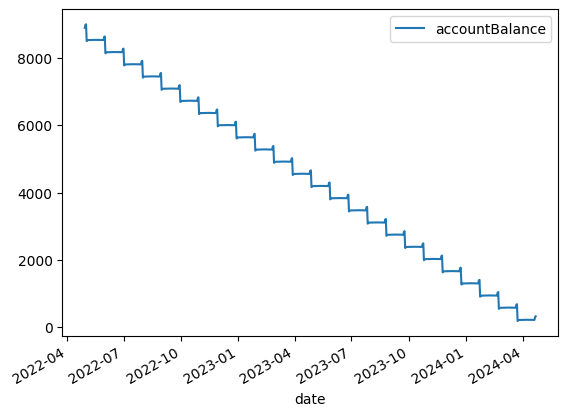

In [11]:
balance_data = {
  'accounts': [
    {
      'account_id': '8L3vAybNgXsp3apvNx6rCqZmMR66gKfZvLwb6',
      'current_balance': 110
    },
    {
      'account_id': 'Ex1nbld8JXhlRplbaWeGUx7pkKnn4gtgZkXqN',
      'current_balance': 210
    }
  ],
  'total_current_balance': 320
}

tot_balance = balance_data['total_current_balance']

daily_amounts['accountBalance'] = daily_amounts['accountBalance'] + tot_balance - daily_amounts['accountBalance'].iloc[-1]
daily_amounts.plot(x='date', y='accountBalance')